In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('rose.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Rosa
1,2,4.9,3.0,1.4,0.2,Rosa
2,3,4.7,3.2,1.3,0.2,Rosa
3,4,4.6,3.1,1.5,0.2,Rosa
4,5,5.0,3.6,1.4,0.2,Rosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Carolinae
146,147,6.3,2.5,5.0,1.9,Carolinae
147,148,6.5,3.0,5.2,2.0,Carolinae
148,149,6.2,3.4,5.4,2.3,Carolinae


In [4]:
# Data cleaning
df.drop('Id',axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Rosa
1,4.9,3.0,1.4,0.2,Rosa
2,4.7,3.2,1.3,0.2,Rosa
3,4.6,3.1,1.5,0.2,Rosa
4,5.0,3.6,1.4,0.2,Rosa


In [6]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Carolinae
146,6.3,2.5,5.0,1.9,Carolinae
147,6.5,3.0,5.2,2.0,Carolinae
148,6.2,3.4,5.4,2.3,Carolinae
149,5.9,3.0,5.1,1.8,Carolinae


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [11]:
# Correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

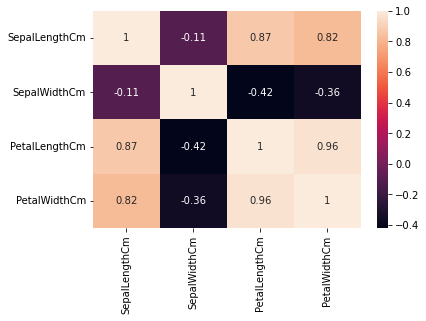

In [12]:
# Visualization
sns.heatmap(df.corr(),annot=True)

In [13]:
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Rosa
1,4.9,3.0,1.4,0.2,Rosa
2,4.7,3.2,1.3,0.2,Rosa
3,4.6,3.1,1.5,0.2,Rosa
4,5.0,3.6,1.4,0.2,Rosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Carolinae
146,6.3,2.5,5.0,1.9,Carolinae
147,6.5,3.0,5.2,2.0,Carolinae
148,6.2,3.4,5.4,2.3,Carolinae


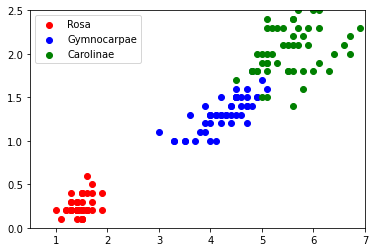

In [14]:
df1 = df.head(50)
df2 = df[df['Species'] == 'Gymnocarpae']
df3 = df[df['Species'] == 'Carolinae']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='r',label='Rosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='b',label='Gymnocarpae')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='g',label='Carolinae')
plt.ylim(0, 2.5)
plt.xlim(0.5, 7.0)
plt.legend()
plt.show()

In [15]:
df_imp = df.iloc[:,0:4]
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse=[]

for k in k_meansclus:
    km = KMeans(n_clusters= k)
    km.fit(df_imp)
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.535582051282056,
 38.95373036498037,
 34.25437337421033,
 29.955568877177573,
 27.993934210526316]

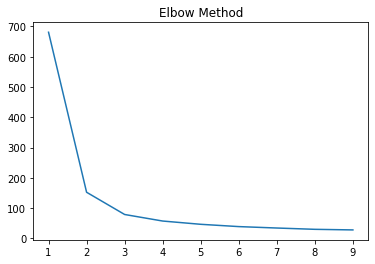

In [17]:
plt.title('Elbow Method')
plt.plot(k_meansclus,sse)
plt.show()

In [18]:
km1 = KMeans(n_clusters=3,max_iter=300,random_state=0)
km1.fit(df_imp)

KMeans(n_clusters=3, random_state=0)

In [19]:
y_means = km1.fit_predict(df_imp)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
km1.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [21]:
df_imp = np.array(df_imp)
df_imp

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

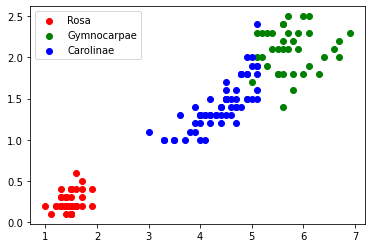

In [22]:
plt.scatter(df_imp[y_means==1, 2],df_imp[y_means==1,3],color='r',label='Rosa')
plt.scatter(df_imp[y_means==2, 2],df_imp[y_means==2,3],color='g',label='Gymnocarpae')
plt.scatter(df_imp[y_means==0, 2],df_imp[y_means==0,3],color='b',label='Carolinae')

plt.legend()
plt.show()